# Visualise forward Euler and Verlet integrators

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from dynamical_system import *
from time_integrator import *

In [24]:
np.random.seed(2512517)
mass = 1.2
k_spring = 0.9
dt = 0.1
T_final = 16.0
harmonic_oscillator = HarmonicOscillator(mass,k_spring)
forward_euler_integrator = ForwardEulerIntegrator(harmonic_oscillator,dt)
verlet_integrator = VerletIntegrator(harmonic_oscillator,dt)
x = np.zeros(1)
v = np.zeros(1)
x[0] = 1.0
v[0] = 0.0

In [25]:
n_step = int(T_final/dt)
energies = np.zeros((2,n_step))
x_phase = np.zeros((2,n_step))
v_phase = np.zeros((2,n_step))

for j, integrator in enumerate((forward_euler_integrator,verlet_integrator)):
    integrator.set_state(x,v)
    for k in range(n_step):
        energies[j,k] = harmonic_oscillator.energy(integrator.x,integrator.v)
        x_phase[j,k] = integrator.x[0]
        v_phase[j,k] = integrator.v[0]
        integrator.integrate(1)    

## Plot phase space diagram

Text(0.5, 0, 'position $x$')

<Figure size 432x288 with 0 Axes>

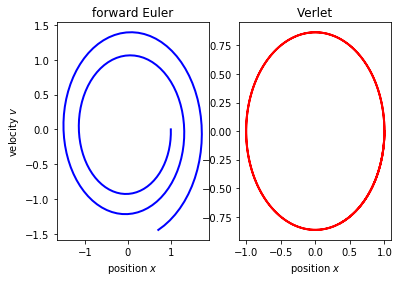

In [27]:
plt.clf()
figs, axs = plt.subplots(1,2)
X = dt*np.arange(n_step)
axs[0].plot(x_phase[0,:],v_phase[0,:],linewidth=2,color='blue')
axs[0].set_title('forward Euler')
axs[0].set_xlabel('position $x$')
axs[0].set_ylabel('velocity $v$')
axs[1].plot(x_phase[1,:],v_phase[1,:],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('position $x$')

## Plot energy drift

<Figure size 432x288 with 0 Axes>

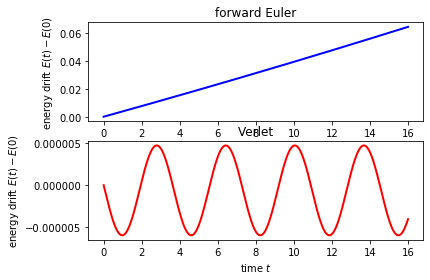

In [10]:
plt.clf()
figs, axs = plt.subplots(2,1)
X = dt*np.arange(n_step)
axs[0].plot(X,energies[0,:]-energies[0,0],linewidth=2,color='blue')
axs[0].set_ylabel('energy drift $E(t)-E(0)$')
axs[0].set_title('forward Euler')
axs[1].plot(X,energies[1,:]-energies[1,0],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('time $t$')
axs[1].set_ylabel('energy drift $E(t)-E(0)$')
plt.savefig('energies.pdf',bbox_inches='tight')